# OpenSatMap Demo
This notebook helps OpenSatMap users to better understand OpenSatMap dataset.

The dataset contains 3,787 high-resolution satellite images with fine-grained annotations, covering diverse geographic locations and popular driving datasets. It can be used for large-scale map construction and downstream tasks like autonomous driving.


In [ ]:
import json
import os

def read_json(file):
  with open(file, 'r') as f:
    return json.load(f)

## Mount Google Drive and clone the repository

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/bjzhb666/OpensatMap-demo.git

## Examples of images

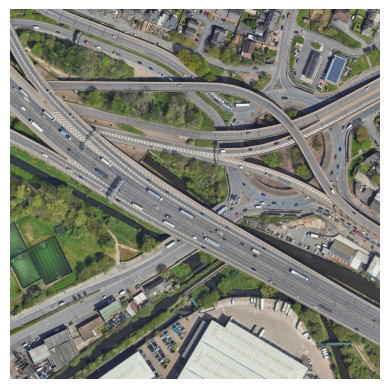

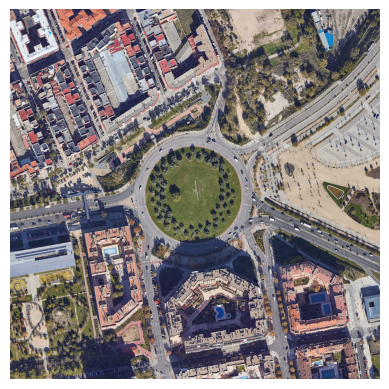

In [ ]:
# read the image in OpenSatMap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('OpensatMap-demo/flyover2_0_0_sat.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

img2 = mpimg.imread('OpensatMap-demo/roundabout5_-1_-1_sat.png')
plt.imshow(img2)
plt.axis('off')
plt.show()

## Examples of annotations
We visualize our fine-grained instance annotations below.

### Print annotations

In [ ]:
json_data_RA = read_json('OpensatMap-demo/RA.json')
json_data_FO = read_json('OpensatMap-demo/FO.json')

for name in json_data_RA:
    print(name)
    for key in json_data_RA[name]:
        print(key)
    print()
    print(json_data_RA[name]['image_width'], json_data_RA[name]['image_height'])
    # see the first line instance
    print(json_data_RA[name]['lines'][0])

roundabout5_-1_-1_sat.png
image_width
image_height
lines

4096 4096
{'category': 'Lane line', 'points': [[1364.8544, 1919.8732], [1345.6692, 1944.8975], [1318.9766, 1969.9217], [1264.7574, 2013.2971], [1227.3335, 2032.0563], [1188.1854, 2045.9904], [1114.8655, 2061.9151], [1047.5173, 2074.5221], [925.7599, 2096.0868]], 'color': 'White', 'line_type': 'Solid', 'boundary': 'True', 'clearness': 'Clear', 'line_num': 'Single', 'bidirection': 'False', 'occlusion': 'No', 'function': 'None'}


### Draw annotations

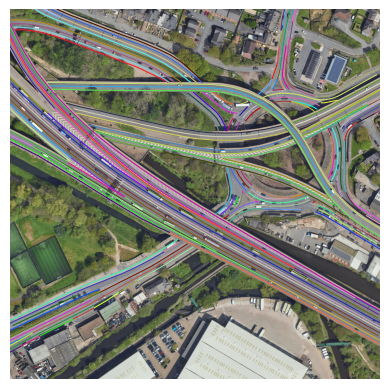

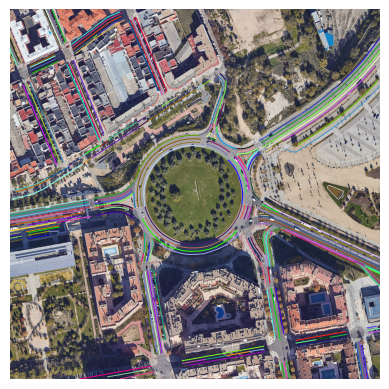

In [ ]:
import random
import numpy as np

def draw_annotations(img, json_data):
  for name in json_data:
    for line in json_data[name]['lines']:
      color = (random.randint(0,255)/255,random.randint(0,255)/255,random.randint(0,255)/255)
      # draw instances
      points = np.array(line['points']).astype(np.int32)
      plt.plot(points[:, 0], points[:, 1], color=color, linewidth=0.75)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


draw_annotations(img1, json_data_FO)
draw_annotations(img2, json_data_RA)